In [1]:
import requests
response=requests.get("https://www.balldontlie.io/api/v1/games")
response.json()["data"]

[{'id': 47179,
  'date': '2019-01-30T00:00:00.000Z',
  'home_team': {'id': 2,
   'abbreviation': 'BOS',
   'city': 'Boston',
   'conference': 'East',
   'division': 'Atlantic',
   'full_name': 'Boston Celtics',
   'name': 'Celtics'},
  'home_team_score': 126,
  'period': 4,
  'postseason': False,
  'season': 2018,
  'status': 'Final',
  'time': ' ',
  'visitor_team': {'id': 4,
   'abbreviation': 'CHA',
   'city': 'Charlotte',
   'conference': 'East',
   'division': 'Southeast',
   'full_name': 'Charlotte Hornets',
   'name': 'Hornets'},
  'visitor_team_score': 94},
 {'id': 48751,
  'date': '2019-02-09T00:00:00.000Z',
  'home_team': {'id': 2,
   'abbreviation': 'BOS',
   'city': 'Boston',
   'conference': 'East',
   'division': 'Atlantic',
   'full_name': 'Boston Celtics',
   'name': 'Celtics'},
  'home_team_score': 112,
  'period': 4,
  'postseason': False,
  'season': 2018,
  'status': 'Final',
  'time': '     ',
  'visitor_team': {'id': 13,
   'abbreviation': 'LAC',
   'city': 'LA',


Objectives: 
1. Get the probability of win of a matches and compare againist betting company
2. After finished the first objectives, use live api to extract statistic and scarp odds from betting campany


To Do:
1. Get a small portion of data of team statistic ✅
2. Pipeline it ✅
3. Build a deep learning classification ✅
    <br>3.1 train/test? 
4. Get the probability ✅
5. check which team estimation perform the best ✅ 
6. try a prediction and makes it like the betting company odds or change the betting odds to probability
7. add the loss vs validation loss
8. scarp betting odds
9. try to keep scarp and see the changes of probability from time to time in matches
10. update the model to make it accurate

Optional task:
1. download data directly from kaggle
2. use make_pipeline instead
3. I have dropped the opportent team for now and remember to add it back
4. use the validation split in the model instead of explicitly ✅

Updates:
<br>2022-03-24 I realize I cannot use the matching point as one of the metrics as the model realized it determine the result and need to get rid of points per game (maybe I can use player performances to see if it determine the result

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
import pandas as pd
import matplotlib.pyplot as plt

Take only the Mavericks as the home team here as Mavericks are known as rely on statistics

In [3]:
df_full=pd.read_csv("games.csv")
df_full_by_team=df_full[df_full["HOME_TEAM_ID"]==1610612742]
df=df_full_by_team[0:20000]

1. drop NA, unneccesary columns ✅
2. check which columns to pipeline ✅
3. get the team name instead of only id ✅

See if need to add below codes:
<br> def get_team(num):
<br>     return team[team["TEAM_ID"]==num]["NICKNAME"].values[0]
<br> df["HOME_TEAM_NAME"]=np.vectorize(get_team)(df["HOME_TEAM_ID"])
<br> df["HOME_TEAM_NAME"]=np.vectorize(get_team)(df["HOME_TEAM_ID"])

In [4]:
df.dropna(axis=0,inplace=True)
df.drop(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home'],axis=1,inplace=True)
team=pd.read_csv("teams.csv")
X=df.drop(["HOME_TEAM_WINS","HOME_TEAM_ID","TEAM_ID_away","PTS_home","PTS_away"],axis=1)
y=df[["HOME_TEAM_WINS"]]

X_scaled = StandardScaler().fit_transform(X)


/tmp/ipykernel_17136/1800484228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
/tmp/ipykernel_17136/1800484228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT',


Try to use make_pipeline below

In [5]:
"""
preproc_numerical_baseline = make_pipeline(StandardScaler())
preproc_categorical_baseline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preproc_baseline = make_column_transformer(
    (preproc_numerical_baseline, ['PTS_home','FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away']),
    (preproc_categorical_baseline, ["HOME_TEAM_ID","VISITOR_TEAM_ID"]),
    remainder="drop")
preproc_baseline
"""

'\npreproc_numerical_baseline = make_pipeline(StandardScaler())\npreproc_categorical_baseline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))\npreproc_baseline = make_column_transformer(\n    (preproc_numerical_baseline, [\'PTS_home\',\'FG_PCT_home\',\n       \'FT_PCT_home\', \'FG3_PCT_home\', \'AST_home\', \'REB_home\',\n       \'PTS_away\', \'FG_PCT_away\', \'FT_PCT_away\', \'FG3_PCT_away\', \'AST_away\',\n       \'REB_away\']),\n    (preproc_categorical_baseline, ["HOME_TEAM_ID","VISITOR_TEAM_ID"]),\n    remainder="drop")\npreproc_baseline\n'

In [6]:
"""
num_transformer = Pipeline([('scaler', StandardScaler())])
cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse=False)
preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, ['PTS_home','FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away']),
    ('cat_tr', cat_transformer, ["TEAM_ID_away"])],remainder='passthrough')
"""

'\nnum_transformer = Pipeline([(\'scaler\', StandardScaler())])\ncat_transformer = OneHotEncoder(handle_unknown=\'ignore\',sparse=False)\npreprocessor = ColumnTransformer([\n    (\'num_tr\', num_transformer, [\'PTS_home\',\'FG_PCT_home\',\n       \'FT_PCT_home\', \'FG3_PCT_home\', \'AST_home\', \'REB_home\',\n       \'PTS_away\', \'FG_PCT_away\', \'FT_PCT_away\', \'FG3_PCT_away\', \'AST_away\',\n       \'REB_away\']),\n    (\'cat_tr\', cat_transformer, ["TEAM_ID_away"])],remainder=\'passthrough\')\n'

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras import callbacks

2022-03-29 16:54:57.346856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 16:54:57.346889: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
def nba_prob_estimate():
    model =Sequential()
    model.add(layers.Dense(20,activation="relu",input_dim=X_scaled.shape[-1]))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [12]:
model = nba_prob_estimate()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = callbacks.EarlyStopping(patience=50, restore_best_weights=True)
history=model.fit(
    X_scaled, y, validation_split=0.33,
    epochs=500, batch_size=32,callbacks=[es])



Epoch 1/500
19/19 [==============================] - 0s 6ms/step - loss: 0.6653 - accuracy: 0.5873 - val_loss: 0.6295 - val_accuracy: 0.7083
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7808 - val_loss: 0.5799 - val_accuracy: 0.7708
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8168 - val_loss: 0.5291 - val_accuracy: 0.7847
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8442 - val_loss: 0.4794 - val_accuracy: 0.8056
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8476 - val_loss: 0.4355 - val_accuracy: 0.8299
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8493 - val_loss: 0.3995 - val_accuracy: 0.8611
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8476 - val_loss: 0.3793 - val_accuracy: 0.8507
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8887 - val_loss: 0.3478 - val_accuracy: 0.8611
Epoch 60/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.8887 - val_loss: 0.3412 - val_accuracy: 0.8681
Epoch 61/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8904 - val_loss: 0.3495 - val_accuracy: 0.8611
Epoch 62/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.8870 - val_loss: 0.3449 - val_accuracy: 0.8681
Epoch 63/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.8938 - val_loss: 0.3464 - val_accuracy: 0.8681
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8955 - val_loss: 0.3456 - val_accuracy: 0.8750
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8955 - val_loss: 0.3484 - val_accuracy: 0.8715
Epoch 

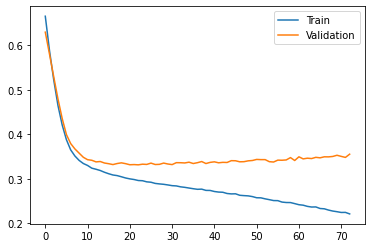

In [16]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

In [17]:
team_id_list=df_full.TEAM_ID_home.unique()
accuracy={}
team=pd.read_csv("teams.csv")
def get_team(num):
    return team[team["TEAM_ID"]==num]["NICKNAME"].values[0]

In [25]:
def get_the_accracy_of_diff_team(team_id_list):
    accuracy={}
    df_full=pd.read_csv("games.csv")
    for i in team_id_list:        
        df=df_full[df_full["HOME_TEAM_ID"]==i]
        df.dropna(axis=0,inplace=True)
        df.drop(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT',
               'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home'],axis=1,inplace=True)
        team=pd.read_csv("teams.csv")
        X=df.drop(["HOME_TEAM_WINS","HOME_TEAM_ID","TEAM_ID_away","PTS_home","PTS_away"],axis=1)
        y=df[["HOME_TEAM_WINS"]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
        X_train_scaled = StandardScaler().fit_transform(X_train)
        model = nba_prob_estimate()
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, validation_data=(X_test, y_test),
            epochs=500, batch_size=32, verbose=0,callbacks=[es])
        accuracy[get_team(i)]=max(history.history["val_accuracy"])
        return accuracy

In [26]:
%%time
get_the_accracy_of_diff_team(team_id_list)

/tmp/ipykernel_17136/1577012100.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)
/tmp/ipykernel_17136/1577012100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT',


CPU times: user 28.8 s, sys: 10.7 s, total: 39.5 s
Wall time: 19.6 s


{'Heat': 0.8453947305679321}

In [24]:
team_id_list

array([1610612748, 1610612741, 1610612759, 1610612744, 1610612743,
       1610612762, 1610612757, 1610612753, 1610612737, 1610612738,
       1610612745, 1610612763, 1610612740, 1610612756, 1610612747,
       1610612755, 1610612766, 1610612765, 1610612749, 1610612750,
       1610612742, 1610612758, 1610612746, 1610612754, 1610612760,
       1610612764, 1610612739, 1610612761, 1610612751, 1610612752])